In [7]:
import pandas as pd
df = pd.read_csv("C:\\Users\\harvi\\Desktop\\richardson-weather-analysis\\data\\richardson weather from 1-2020 to 12-2024.csv")
df.head()

,STATION,NAME,DATE,PRCP,TMAX,TMIN
0,USC00417588,"RICHARDSON, TX US",2020-01-01,0.0,54.0,41.0
1,USC00417588,"RICHARDSON, TX US",2020-01-02,0.0,59.0,46.0
2,USC00417588,"RICHARDSON, TX US",2020-01-03,0.0,60.0,45.0
3,USC00417588,"RICHARDSON, TX US",2020-01-04,0.0,59.0,36.0
4,USC00417588,"RICHARDSON, TX US",2020-01-05,0.0,68.0,39.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1827 non-null   object 
 1   NAME     1827 non-null   object 
 2   DATE     1827 non-null   object 
 3   PRCP     1827 non-null   float64
 4   TMAX     1824 non-null   float64
 5   TMIN     1824 non-null   float64
dtypes: float64(3), object(3)
memory usage: 85.8+ KB


In [9]:
df.isnull().sum()

STATION    0
NAME       0
DATE       0
PRCP       0
TMAX       3
TMIN       3
dtype: int64

In [16]:
df.describe().round(0)

,PRCP,TMAX,TMIN
count,1827.0,1824.0,1824.0
mean,0.0,77.0,57.0
std,0.0,16.0,16.0
min,0.0,19.0,0.0
25%,0.0,66.0,44.0
50%,0.0,79.0,59.0
75%,0.0,91.0,72.0
max,4.0,109.0,90.0


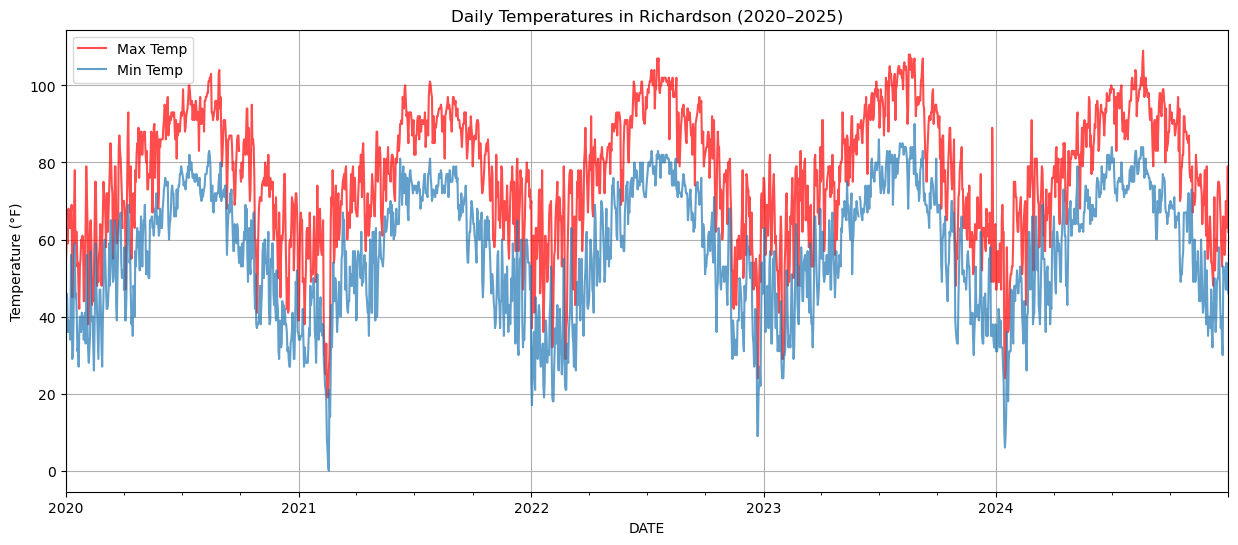

In [17]:
import matplotlib.pyplot as plt

# Plot daily max and min temperature
plt.figure(figsize=(15,6))
df['TMAX'].plot(label='Max Temp', alpha=0.7, color='red')
df['TMIN'].plot(label='Min Temp', alpha=0.7)
plt.title('Daily Temperatures in Richardson (2020–2025)')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.grid(True)
plt.savefig('daily_temperatures.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
# As we can see on the graph, there is an outlier in early 2021. This was due to the events of Winter Storm Uri.

In [18]:
# Top 10 hottest days
df.sort_values('TMAX', ascending=False).head(10)[['TMAX']]

,TMAX
DATE,
2024-08-19,109.0
2023-08-19,108.0
2023-08-18,108.0
2023-08-17,108.0
2023-09-08,107.0
2023-08-21,107.0
2022-07-18,107.0
2023-08-26,107.0
2022-07-20,107.0


In [19]:
# Top 10 coldest days
df.sort_values('TMIN').head(10)[['TMIN']]

,TMIN
DATE,
2021-02-17,0.0
2021-02-16,1.0
2021-02-15,5.0
2024-01-15,6.0
2021-02-14,8.0
2022-12-22,9.0
2024-01-16,9.0
2022-12-23,9.0
2024-01-14,10.0


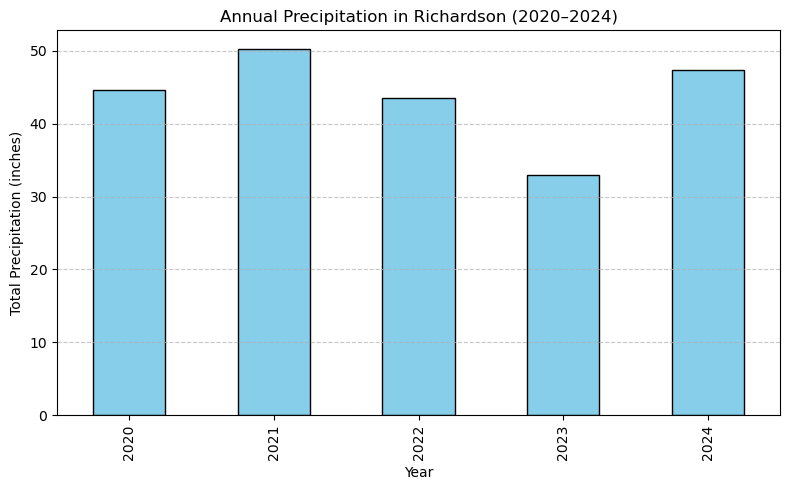

In [23]:
# Now extract the year
df['year'] = df.index.year

# Filter for full years only
full_years = df[(df['year'] >= 2020) & (df['year'] <= 2024)]

# Group and plot
annual_precip = full_years.groupby('year')['PRCP'].sum()

plt.figure(figsize=(8, 5))
annual_precip.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Annual Precipitation in Richardson (2020–2024)')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (inches)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


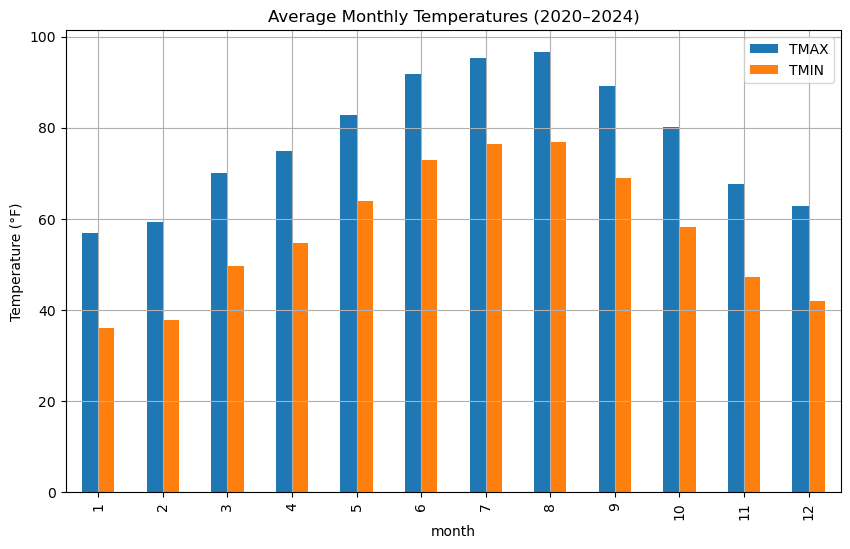

In [24]:
df['month'] = df.index.month
monthly_avg = df.groupby('month')[['TMAX', 'TMIN']].mean()

monthly_avg.plot(kind='bar', figsize=(10,6))
plt.title('Average Monthly Temperatures (2020–2024)')
plt.ylabel('Temperature (°F)')
plt.grid(True)
plt.show()

In [ ]:
# A chart showing the average temperatures of each month between the time frame.

In [25]:
df.sort_values('PRCP', ascending=False).head(10)[['PRCP']]

,PRCP
DATE,
2021-06-05,4.10
2020-09-09,3.53
2021-05-16,3.50
2022-08-22,3.20
2022-10-24,3.10
2022-05-24,2.87
2024-05-30,2.80
2024-05-05,2.67
2020-08-30,2.63


In [20]:
# Days with the highest precipitation.